In [ ]:
import kagglehub

# Downloading the dataset from Kaggle
brain_tumor_dataset_path = kagglehub.dataset_download('sartajbhuvaji/brain-tumor-classification-mri')

print("Dataset import completed successfully.")


100%|██████████| 86.8M/86.8M [00:01<00:00, 66.0MB/s]

Extracting files...


Dataset import completed successfully.


In [ ]:

import numpy as np
import pandas as pd

import os

# Displaying all files in the input directory
input_directory = '/kaggle/input'
for root, _, files in os.walk(input_directory):
    for file in files:
        print(os.path.join(root, file))


In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout
from sklearn.metrics import accuracy_score

In [ ]:
# Importing essential libraries
import ipywidgets as widgets  # For creating interactive widgets
import io  # For handling input/output operations
from PIL import Image  # For image manipulation and processing
import tqdm  # For displaying progress bars
from sklearn.model_selection import train_test_split  # For splitting datasets
import cv2  # For image processing using OpenCV
from sklearn.utils import shuffle  # For shuffling data
import tensorflow as tf  # For building and training deep learning models


In [ ]:
X_train = []
Y_train = []
image_size = 150
labels = ['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']
for i in labels:
    folderPath = os.path.join('/content/drive/MyDrive/Datasets/Dataset/Training',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)

for i in labels:
    folderPath = os.path.join('/content/drive/MyDrive/Datasets/Dataset/Testing',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)

X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [ ]:
X_train,Y_train = shuffle(X_train,Y_train,random_state=101)
X_train.shape

(3287, 150, 150, 3)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_train,Y_train,test_size=0.1,random_state=101)

In [ ]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train=y_train_new
y_train = tf.keras.utils.to_categorical(y_train)

y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test=y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

In [ ]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu',input_shape=(150,150,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512,activation = 'relu'))
model.add(Dense(512,activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(4,activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 146, 146, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 73, 73, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 73, 73, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 71, 71, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 69, 69, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 69, 69, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 34, 34, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 34, 34, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 30, 30, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 12, 12, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 10, 10, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 5, 5, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6400)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       3,277,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 4,447,044 (16.96 MB)

 Trainable params: 4,447,044 (16.96 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [ ]:
history = model.fit(X_train,y_train,epochs=20,validation_split=0.1)

Epoch 1/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 36s 231ms/step - accuracy: 0.2971 - loss: 4.5957 - val_accuracy: 0.2838 - val_loss: 1.3578
Epoch 2/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 14s 69ms/step - accuracy: 0.3164 - loss: 1.3516 - val_accuracy: 0.4426 - val_loss: 1.2809
Epoch 3/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 6s 70ms/step - accuracy: 0.4967 - loss: 1.1355 - val_accuracy: 0.5270 - val_loss: 0.9730
Epoch 4/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 10s 70ms/step - accuracy: 0.5983 - loss: 0.9219 - val_accuracy: 0.5743 - val_loss: 0.8556
Epoch 5/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 10s 70ms/step - accuracy: 0.6495 - loss: 0.7879 - val_accuracy: 0.6182 - val_loss: 0.7825
Epoch 6/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 6s 73ms/step - accuracy: 0.6823 - loss: 0.7253 - val_accuracy: 0.7230 - val_loss: 0.6075
Epoch 7/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 10s 71ms/step - accuracy: 0.7458 - loss: 0.5948 - val_accuracy: 0.6959 - val_loss: 0.6457
Epoch 8/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 10s 74ms/step - accuracy: 0.7692 - loss: 0.5382 - val_accuracy: 0.7

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

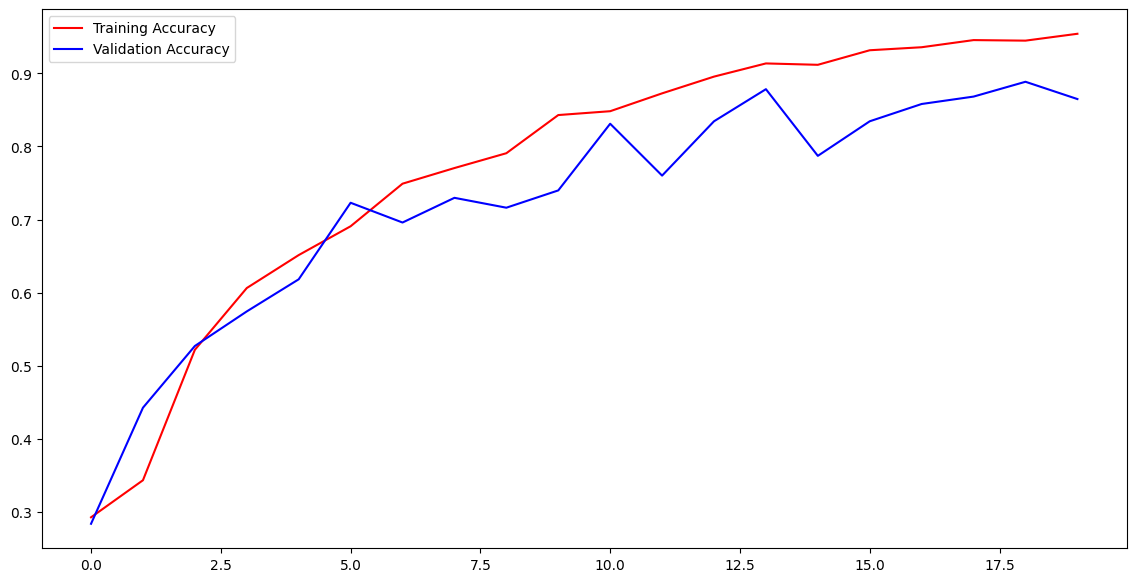

In [ ]:
#model.save('braintumor.h5')

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.legend(loc='upper left')
plt.show()

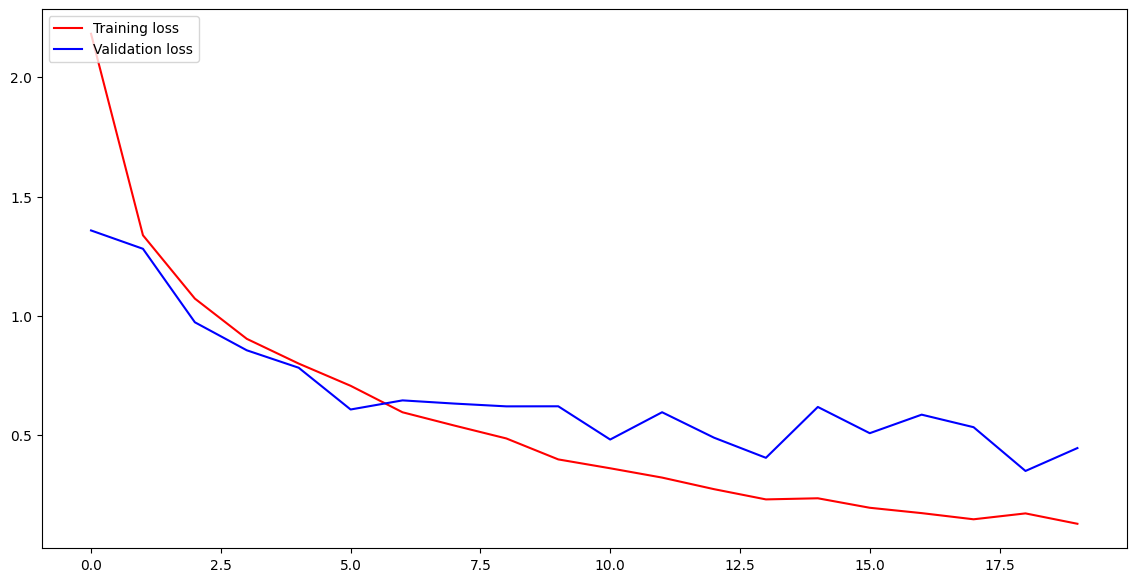

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.legend(loc='upper left')
plt.show()

In [ ]:
img = cv2.imread('/content/drive/MyDrive/Datasets/Dataset/Testing/no_tumor/image(1).jpg')
img = cv2.resize(img,(150,150))
img_array = np.array(img)
img_array.shape

(150, 150, 3)

In [ ]:
img_array = img_array.reshape(1,150,150,3)
img_array.shape

(1, 150, 150, 3)

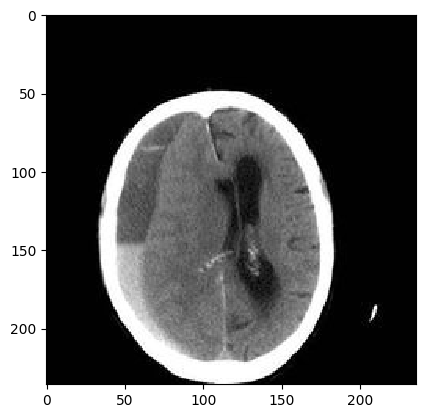

In [ ]:
from tensorflow.keras.preprocessing import image
img = image.load_img('/content/drive/MyDrive/Datasets/Dataset/Testing/no_tumor/image(1).jpg')
plt.imshow(img,interpolation='nearest')
plt.show()

In [ ]:
a=model.predict(img_array)
indices = a.argmax()
indices
if(indices==0):
    print("Glioma Tumor")
elif(indices==1):
    print("Meningioma Tumor")
elif(indices==2):
    print("No Tumor:)")
else:
    print("Pituitary Tumor")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
No Tumor:)
